<a href="https://colab.research.google.com/github/ritikaranganthan/IPSVIP/blob/main/TASK_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NAME: RITIKA RANGANATHAN**

**MACHINE LEARNING INTERN AT INFOPILLAR SOLUTION Pvt Ltd**

**TASK-1: Loan Prediction using Machine Learning**

**IMPORT LIBRARY**

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston



**LOADING DATA**

In [17]:
from google.colab import files
uploaded = files.upload()

Saving boston.csv to boston.csv


In [18]:
data=pd.read_csv('boston.csv')

In [19]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [20]:
data.shape

(506, 14)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [22]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [24]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [25]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

**TESTING DATASET**

In [27]:
#splitting the variables
#X and Y
X=data.iloc[ :, :-1].values
Y=data.iloc[ :, -1].values

print('Shape of X is',X.shape)
print('Shape of Y is',Y.shape)

Shape of X is (506, 13)
Shape of Y is (506,)


In [28]:
#splitting train and test datasets
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print('Shape of X_train is', X_train.shape)
print('Shape of X_test is', X_test.shape)
print('Shape of Y_train is', Y_train.shape)

Shape of X_train is (404, 13)
Shape of X_test is (102, 13)
Shape of Y_train is (404,)


In [31]:
#separating valid datasets from train datasets
#X_train = training variable
#X_test = testing variable
from sklearn.model_selection import train_test_split

X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.2, random_state=0)
print('Shape of X_train is', X_train.shape)
print('Shape of X_valid is', X_valid.shape)
print('Shape of Y_train is', Y_train.shape)
print('Shape of Y_valid is', Y_valid.shape)

Shape of X_train is (258, 13)
Shape of X_valid is (65, 13)
Shape of Y_train is (258,)
Shape of Y_valid is (65,)


In [37]:
from sklearn.linear_model import LinearRegression
linear=LinearRegression()
linear.fit(X_train, Y_train)
pred_test=linear.predict(X_test)
pred_train=linear.predict(X_train)

In [39]:
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(Y_train, pred_train)))

4.280511177573131


In [40]:
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(Y_test, pred_test)))

5.859346062725877


In [41]:
from sklearn.metrics import r2_score
r2_score(Y_test, pred_test)

0.5783790444922663

**PREDICTIONS MADE**

In [42]:
#comapring actual and predicted values
data = pd.DataFrame({'Actual': Y_test, 'Prediction': pred_test})
data

,Actual,Prediction
0,22.6,25.314204
1,50.0,23.837261
2,23.0,27.219320
3,8.3,11.772135
4,21.2,21.220280
...,...,...
97,24.7,25.212591
98,14.1,15.832691
99,18.7,17.701415
100,28.1,25.923634


**VISUALIZATION OF DATASETS**

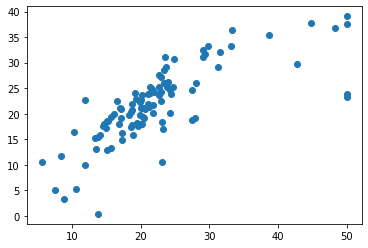

In [43]:
plt.scatter(Y_test,pred_test)

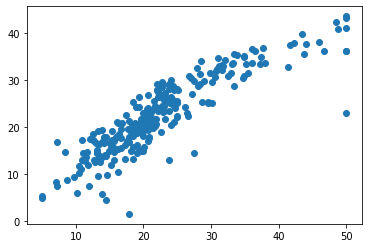

In [44]:
plt.scatter(Y_train,pred_train)

**EVALUATION OF DATASET**

In [45]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, pred_test))

Mean Absolute Error: 3.9091396494185515


##THANK YOU